In [11]:
# ייבוא ספריות
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [12]:
# התפלגות נורמלית
normal_dist = np.random.randn(10000) 

def print_stat(array):
    print("↡↡↡--mean--↡↡↡")
    print(round(np.mean(normal_dist)))
    print("↡↡↡--std--↡↡↡") 
    print(round(np.std(normal_dist)))
    print("↡↡↡--median--↡↡↡")
    print(round(np.median(normal_dist)))
    print("↡↡↡--mode--↡↡↡")
    print(round(stats.mode(normal_dist)[0][0]))

print_stat(normal_dist)



↡↡↡--mean--↡↡↡
0
↡↡↡--std--↡↡↡
1
↡↡↡--median--↡↡↡
0
↡↡↡--mode--↡↡↡
-4


↡↡↡--mean--↡↡↡
3
↡↡↡--std--↡↡↡
3
↡↡↡--median--↡↡↡
3
↡↡↡--mode--↡↡↡
-9


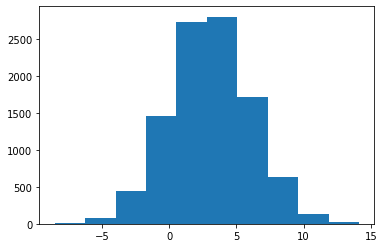

In [13]:
normal_dist = 3 * np.random.randn(10000) + 3 # ניתן לבצע הזזות 

plt.hist(normal_dist)

print_stat(normal_dist)

In [14]:
#  אחוזון ה80
np.percentile(normal_dist,80)

5.515816196579441

In [15]:


def remove_column_outliers(columnName,df):
    
    df_s = df
    df = df.sort_values(by=[columnName],ascending=False)
    df = df[[columnName]]

    z_scores = stats.zscore(df)
    abs_z = (np.abs(z_scores))
    filter = (abs_z < 1).all(axis = 1)

    if df.shape[0] != filter.sum():
        print("!!--We found Outliers--!!")
        print("----------------------------")
        print("↡↡↡--Top outliears--↡↡↡")
        print(df.head(3))
        print("----------------------------")
        print("↡↡↡-- Bottom outliears--↡↡↡")
        print(df.tail(3))
        

        decision = int(input("Do you want us to clean the outliers? 0 = no , 1 = yes, but not too many , 2 = yaa!! clean it all!"))

        if decision == 1:
            new_df = df[filter]
            return(new_df)
        elif decision == 2:
            num_slice = int(df.shape[0]*0.2)
            df_temp = df.abs()
            top =df.shape[0] - num_slice - 1
            bottom = num_slice 
            new_df2 = df_temp.loc[bottom:top]
            return new_df2
        else: 
            return(df_s)
    else:
        print("No outliers ;)")
        return(df_s)

    

the best way to describe your data is by Histogram


,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


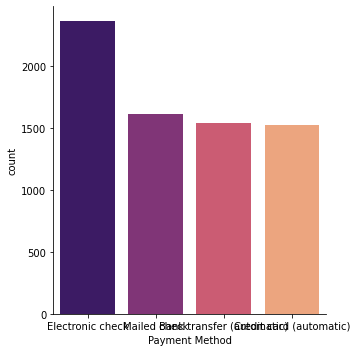

In [33]:
import pandas as pd
from scipy import stats
import seaborn as sns
import numpy as np

def deicide_trim_orNot(columnName,df):
    
    df_s = df
    df = df.sort_values(by=[columnName],ascending=False)
    df = df[[columnName]]

    z_scores = stats.zscore(df)
    abs_z = (np.abs(z_scores))
    filter = (abs_z < 1).all(axis = 1)

    if df.shape[0] != filter.sum():
        trim = str(round(stats.trim_mean(df, 0.25)[0],2))
        return "the best kpi that describe your data is : Trim Mean : " + trim   
    else:
        return("No outliers ;)  the best kpi that describe your data is : Mean" + str(df.mean()[0]))

########################################################

def normal_std(df):
   x = int(df.std())
   x = str(x)
   count = int(len(x))
   x = int(x)
   return x*10**(-abs((count-2)))

########################################################

def clean_dollar(df):
    df = df.astype(str)
    df= df.replace(r"\$","",regex= True)
    df= df.replace(r"\,","",regex=True)
    df= df.replace(r"\%","",regex=True)
    df = df.astype(float)
    return df

########################################################

def top_analyst(columnName,df):
    df_save = df
    df = df[[columnName]]

    if df.dtypes[0] == 'int' or df.dtypes[0] == 'float':
        if columnName.lower() == "salary":
            return "the best kpi that describe your data is : Median:  " +  str(round(df.median()[0]))
        elif normal_std(df) > 2:
            return deicide_trim_orNot(columnName,df_save)
        else:
            return "No outliers ;)  the best kpi that describe your data is : Mean " + str(round(df.mean()[0],2))  

    elif df.dtypes[0] == 'object':
        if "$" in df[columnName][1] or columnName.lower() == "Salary":
            user= int(input("now we talk money! salary = 1 money change over time = 0"))
            if user == 1:
                df = clean_dollar(df)
                return "the best kpi that describe your data is : Median:  " +  str(round(df.median()[0]))

            elif user == 0:
                df = clean_dollar(df)
                df = df.pct_change() + 1
                df = df.loc[1:]
                return "the best kpi that describe your data is Geometric Mean: "+ str(round(stats.gmean(df)[0],2))

        elif "%" in df[columnName][1]:
            user= int(input("change over time? yes = 1 no = 0"))
            if user ==  1:
                df = clean_dollar(df)
                df = df.loc[1:] / 100
                return "the best kpi that describe your data is Geometric Mean: "+ str(round(stats.gmean(df)[0],2))
            else:
                df = clean_dollar(df)
                trim = str(round(stats.trim_mean(df, 0.25)[0],2))
                return "the best kpi that describe your data is : Trim Mean : " + trim +"%"
        else:
            print("the best way to describe your data is by Histogram")
            return sns.catplot(x = columnName,kind = "count",palette= "magma",data = df)
            
    


df = pd.read_excel("Churn.xlsx")

print(top_analyst("Payment Method",df))

df.head()